In [10]:
import dicom2nifti
import nibabel as nib
import matplotlib.pyplot as plt

In [14]:
path_to_dicom = "C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/SE000001/"

In [15]:
dicom2nifti.convert_directory(path_to_dicom, "C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/")

In [17]:
nifti = nib.load("C:/Users\Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/201_t2w_tse.nii.gz")

In [18]:
print(nifti)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine:
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

In [19]:
nifti.header["qoffset_x"]

array(115.27232, dtype=float32)

In [20]:
nifti.shape

(256, 256, 27)

In [21]:
image_array = nifti.get_fdata()

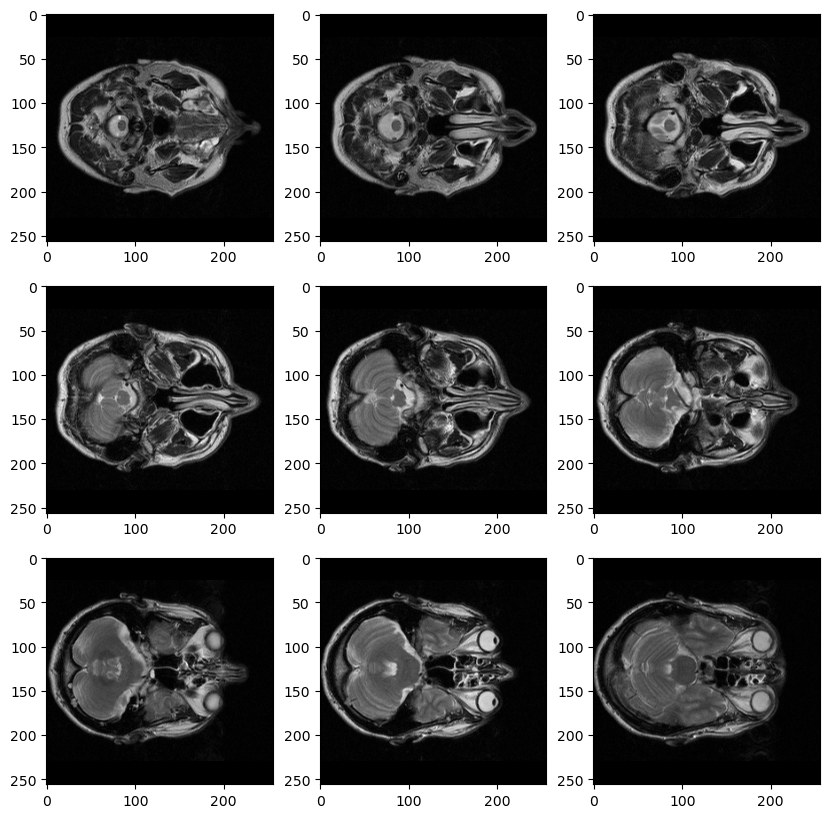

In [22]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(image_array[:,:,slice_counter], cmap="gray")
        slice_counter+=1

In [23]:
image_array_processed = image_array * (image_array > 300)

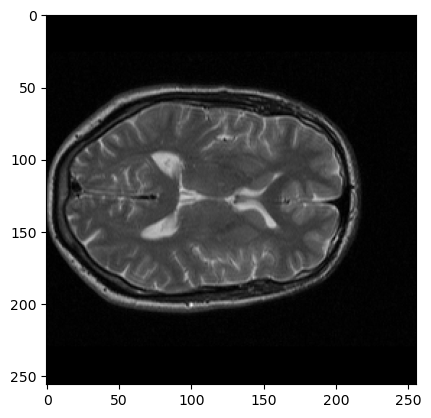

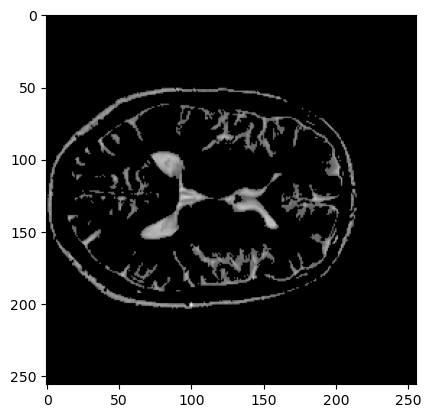

In [24]:
plt.figure()
plt.imshow(image_array[:,:,13], cmap="gray")
plt.figure()
plt.imshow(image_array_processed[:,:,13], cmap="gray")

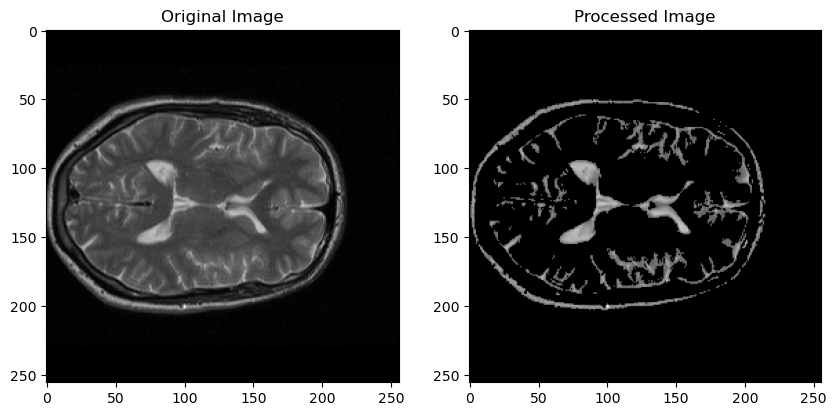

In [29]:
# side by side

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 1 row and 2 columns of subplots

# Display the first image in the first subplot
axs[0].imshow(image_array[:,:,13], cmap="gray")
axs[0].set_title('Original Image')

# Display the second image in the second subplot
axs[1].imshow(image_array_processed[:,:,13], cmap="gray")
axs[1].set_title('Processed Image')

plt.show()

In [25]:
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)

In [30]:
nib.save(processed_nifti, 
         "C:/Users\Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/201_t2w_tse_processed.nii.gz")